# Load Dataset

In [1]:
import pandas as pd
import os
import numpy as np
from pprint import pprint

In [2]:
from pathlib import Path

def load_data(directory, nrows=None):
# Read each CSV file in dir "path/to/root_dir"
    dfs = []
    for file in Path(directory).glob('**/*.csv'):
        dfs.append(pd.read_csv(file, nrows=nrows))
    # Put the dataframes to a single dataframe
    df = pd.concat(dfs, ignore_index=True)
    return df

malware_dir = os.path.join(os.getcwd(), 'dataset', 'Malware')

df = load_data(malware_dir, nrows=100)

# shuffle dataset
df = df.sample(frac=1).reset_index(drop=True)

# trim columns labels
df.columns = df.columns.str.strip()

# Drop "MALWARE" or NaN rows
df.drop(df[(df['Label'] == "MALWARE") | (df["Label"] == "BENIGN")].index, inplace = True)
# df.drop(df[df['Label'] == "BENIGN"].index, inplace = True)
df.dropna(inplace=True)

df["Label"] = df["Label"].apply(lambda x: x.split("_")[0])
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.217.3.110-10.42.0.42-443-33974-6,172.217.3.110,443,10.42.0.42,33974,6,14/07/2017 01:22:57,28,2,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SMSMALWARE
1,157.240.2.20-10.42.0.42-443-32966-6,10.42.0.42,32966,157.240.2.20,443,6,28/06/2017 02:43:59,6729939,2,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SMSMALWARE
2,172.217.12.168-10.42.0.211-443-48355-6,10.42.0.211,48355,172.217.12.168,443,6,25/08/2017 10:39:00,53285,2,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RANSOMWARE
3,172.217.10.131-10.42.0.151-443-57607-6,10.42.0.151,57607,172.217.10.131,443,6,30/06/2017 02:10:47,3858,2,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SCAREWARE
4,208.80.154.224-10.42.0.151-80-56926-6,10.42.0.151,56926,208.80.154.224,80,6,22/08/2017 10:29:39,42457698,2,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RANSOMWARE


In [4]:
df.shape

(297805, 85)

<Axes: xlabel='Label', ylabel='# occurrences'>

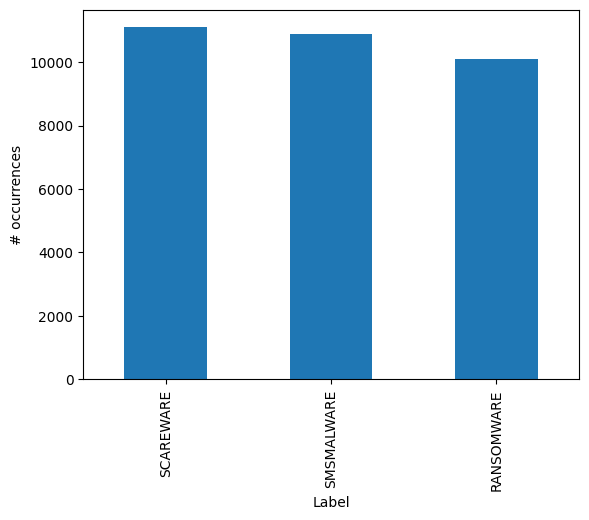

In [3]:
df["Label"].value_counts().plot(
    kind="bar",
    xlabel="Label",
    ylabel="# occurrences"
)

# Data Preprocessing

In [4]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

def data_preprocessing(df: pd.DataFrame) -> pd.DataFrame:
    df['Source IP'] = label_encoder.fit_transform(df['Source IP'])
    df['Flow ID'] = label_encoder.fit_transform(df['Flow ID'])
    df['Destination IP'] = label_encoder.fit_transform(df['Destination IP'])

    # drop column Timestamp
    df = df.drop(['Timestamp'], axis=1)
    df = df.dropna()
    return df

df = data_preprocessing(df)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Label'], axis=1),
    df['Label'],
    test_size=0.4,
    random_state=42
)

#p = 0.8
#train_df, test_df = df[:int(len(df)*p)], df[int(len(df)*p):]

X_train.shape, X_test.shape

((19260, 83), (12840, 83))

In [26]:
X_train.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
443452,419302,18,5353.0,3880,5353.0,17.0,92823578.0,2.0,0.0,163.0,...,1.0,20.0,0.0,0.0,0.0,0.0,9.282358e+07,0.000000e+00,92823578.0,92823578.0
450326,168964,20,43842.0,389,443.0,6.0,1180790.0,8.0,8.0,3551.0,...,5.0,20.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0
171871,316719,19,33743.0,2070,443.0,6.0,35440.0,2.0,0.0,0.0,...,0.0,32.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0
952161,232402,21,56723.0,634,80.0,6.0,55272868.0,6.0,0.0,8712.0,...,5.0,20.0,5360394.0,0.0,5360394.0,5360394.0,1.663749e+07,1.089699e+07,28523353.0,7118385.0
416104,181465,20,47677.0,897,80.0,6.0,536885.0,4.0,4.0,1466.0,...,2.0,20.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0


In [27]:
y_train.head()

443452     SCAREWARE
450326    RANSOMWARE
171871    RANSOMWARE
952161    SMSMALWARE
416104    RANSOMWARE
Name: Label, dtype: object

# Valutazione

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(
        xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        xticklabels=classes,
        yticklabels=classes,
        title=title,
        ylabel='True label',
        xlabel='Predicted label'
    )
    plt.setp(
        ax.get_xticklabels(),
        rotation=45,
        ha='right',
        rotation_mode='anchor'
    )
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt), ha='center', va='center', color='white' if cm[i, j] > thresh else 'black')
    fig.tight_layout()
    return ax

def valuate(clf, x_test, y_test):
    y_pred = clf.predict(x_test)
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred, classes=clf.classes_, title='Confusion matrix')


# Decision Tree

In [29]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train, y_train)

[Text(0.5, 0.875, 'Source IP <= 20.5\ngini = 0.65\nsamples = 587629\nvalue = [209428, 240960, 137241]\nclass = SCAREWARE'),
 Text(0.25, 0.625, 'Source IP <= 19.5\ngini = 0.642\nsamples = 389386\nvalue = [155645, 153996, 79745]\nclass = RANSOMWARE'),
 Text(0.125, 0.375, 'Fwd Packet Length Max <= 1460.5\ngini = 0.608\nsamples = 166037\nvalue = [60424, 80950, 24663]\nclass = SCAREWARE'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Init_Win_bytes_backward <= 339.5\ngini = 0.65\nsamples = 223349\nvalue = [95221, 73046, 55082]\nclass = RANSOMWARE'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Source IP <= 21.5\ngini = 0.65\nsamples = 198243\nvalue = [53783, 86964, 57496]\nclass = SCAREWARE'),
 Text(0.625, 0.375, 'Max Packet Length <= 1461.5\ngini = 0.636\nsamples = 132923\nvalue = [29259, 61980, 41684]\nclass = SCAREWARE'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '

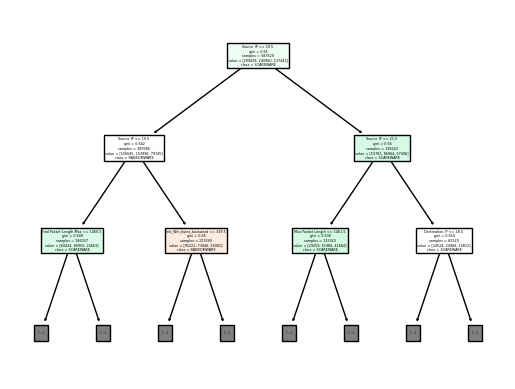

In [30]:
tree.plot_tree(decision_tree, filled=True, class_names=decision_tree.classes_, feature_names=X_train.columns, max_depth=2)

              precision    recall  f1-score   support

  RANSOMWARE       0.77      0.75      0.76    139515
   SCAREWARE       0.65      0.67      0.66    160204
  SMSMALWARE       0.51      0.50      0.51     92034

    accuracy                           0.66    391753
   macro avg       0.64      0.64      0.64    391753
weighted avg       0.66      0.66      0.66    391753



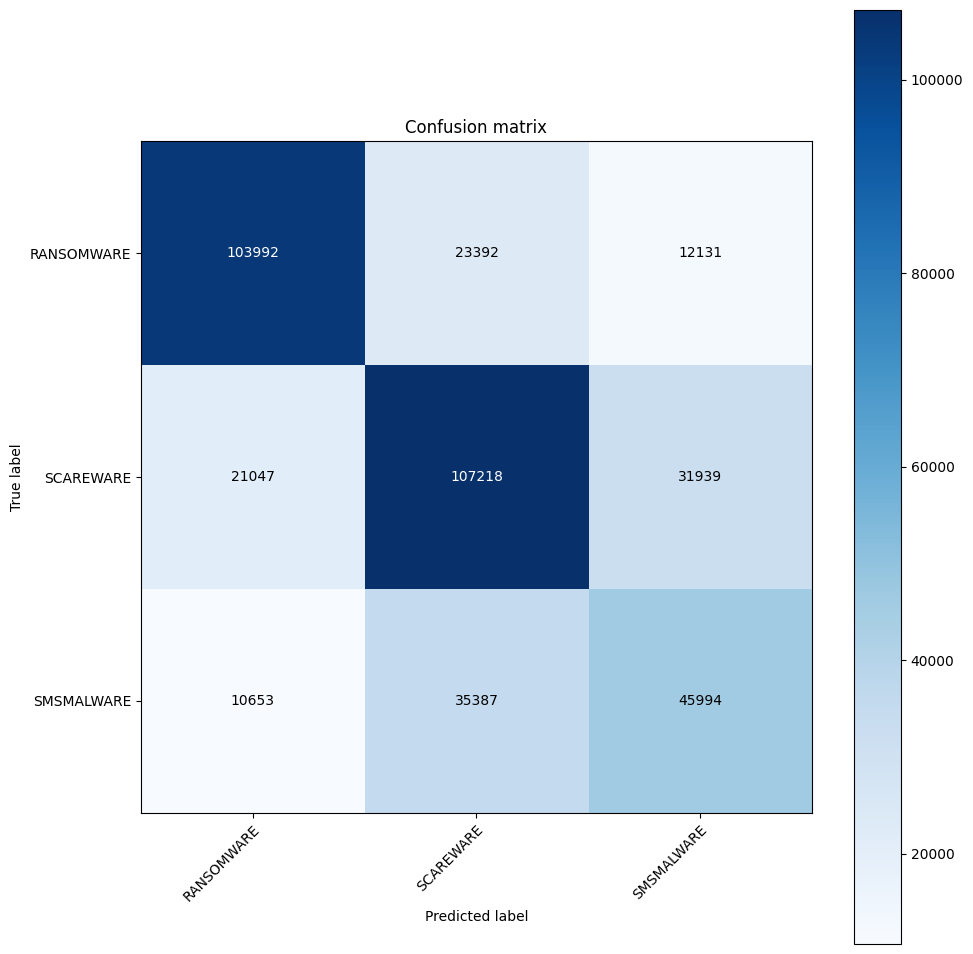

In [31]:
valuate(decision_tree, X_test, y_test)

In [32]:
from sklearn.model_selection import cross_validate

scores = cross_validate(
    decision_tree,
    X_train,
    y_train,
    cv=10,
    scoring=['accuracy', 'precision_macro', 'recall_macro']
)

In [33]:
print(f'{10}-fold cross validation:')
# print('Accuracy: %0.2f (+/- %0.2f)' % (scores['test_precision_macro'].mean(), scores['test_precision_macro'].std() * 2))
print('Precision: %0.2f (+/- %0.2f)' % (scores['test_precision_macro'].mean(), scores['test_precision_macro'].std() * 2))
print('Recall: %0.2f (+/- %0.2f)' % (scores['test_recall_macro'].mean(), scores['test_recall_macro'].std() * 2))

10-fold cross validation:
Precision: 0.64 (+/- 0.00)
Recall: 0.64 (+/- 0.00)


# KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train[:50000], y_train[:50000])

KNeighborsClassifier(n_neighbors=3)

              precision    recall  f1-score   support

  RANSOMWARE       0.44      0.57      0.49    139515
   SCAREWARE       0.49      0.46      0.47    160204
  SMSMALWARE       0.36      0.23      0.28     92034

    accuracy                           0.44    391753
   macro avg       0.43      0.42      0.42    391753
weighted avg       0.44      0.44      0.44    391753



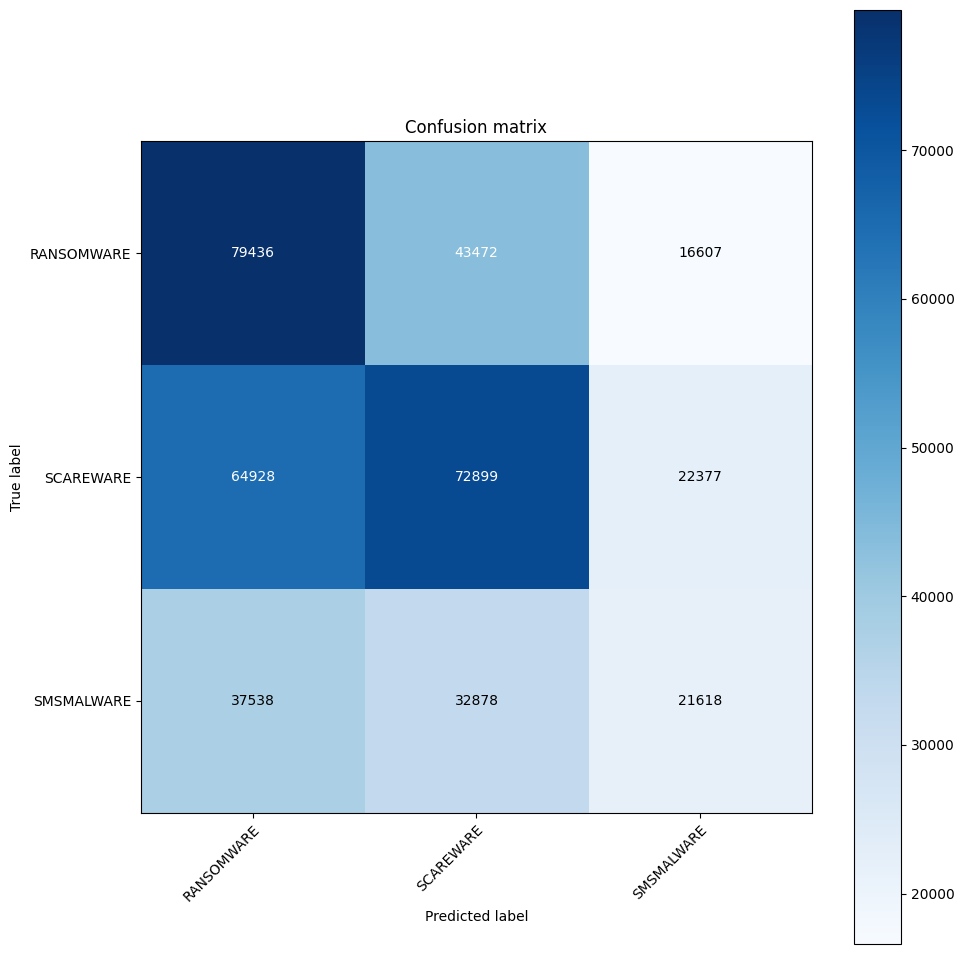

In [39]:
valuate(knn, X_test, y_test)

# Support Vector Machine

In [8]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

C=1.0
models = (
    # svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=1000, dual=True),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    #svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = [clf.fit(X_train[:5_000], y_train[:5_000]) for clf in models]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC:
              precision    recall  f1-score   support

  RANSOMWARE       0.30      0.48      0.37      1255
   SCAREWARE       0.36      0.16      0.22      1477
  SMSMALWARE       0.31      0.33      0.32      1268

    accuracy                           0.31      4000
   macro avg       0.32      0.32      0.30      4000
weighted avg       0.32      0.31      0.30      4000

SVC:
              precision    recall  f1-score   support

  RANSOMWARE       0.00      0.00      0.00      1255
   SCAREWARE       0.37      1.00      0.54      1477
  SMSMALWARE       0.33      0.00      0.00      1268

    accuracy                           0.37      4000
   macro avg       0.23      0.33      0.18      4000
weighted avg       0.24      0.37      0.20      4000



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

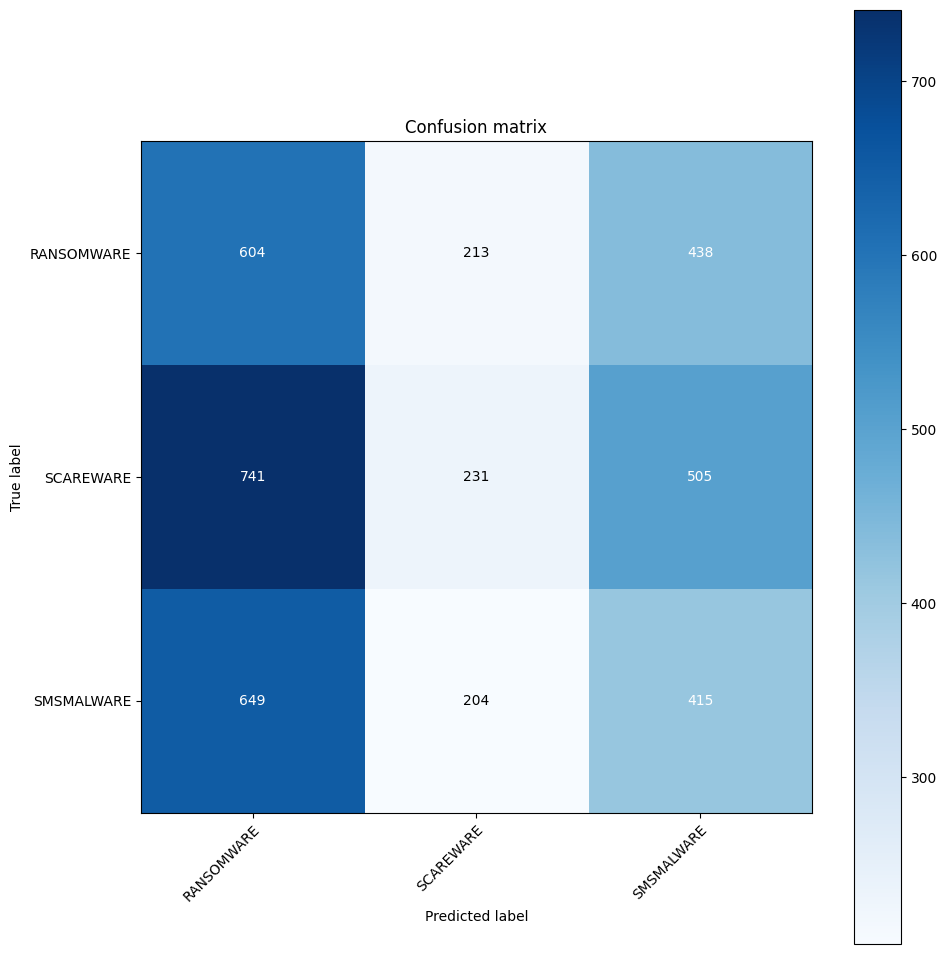

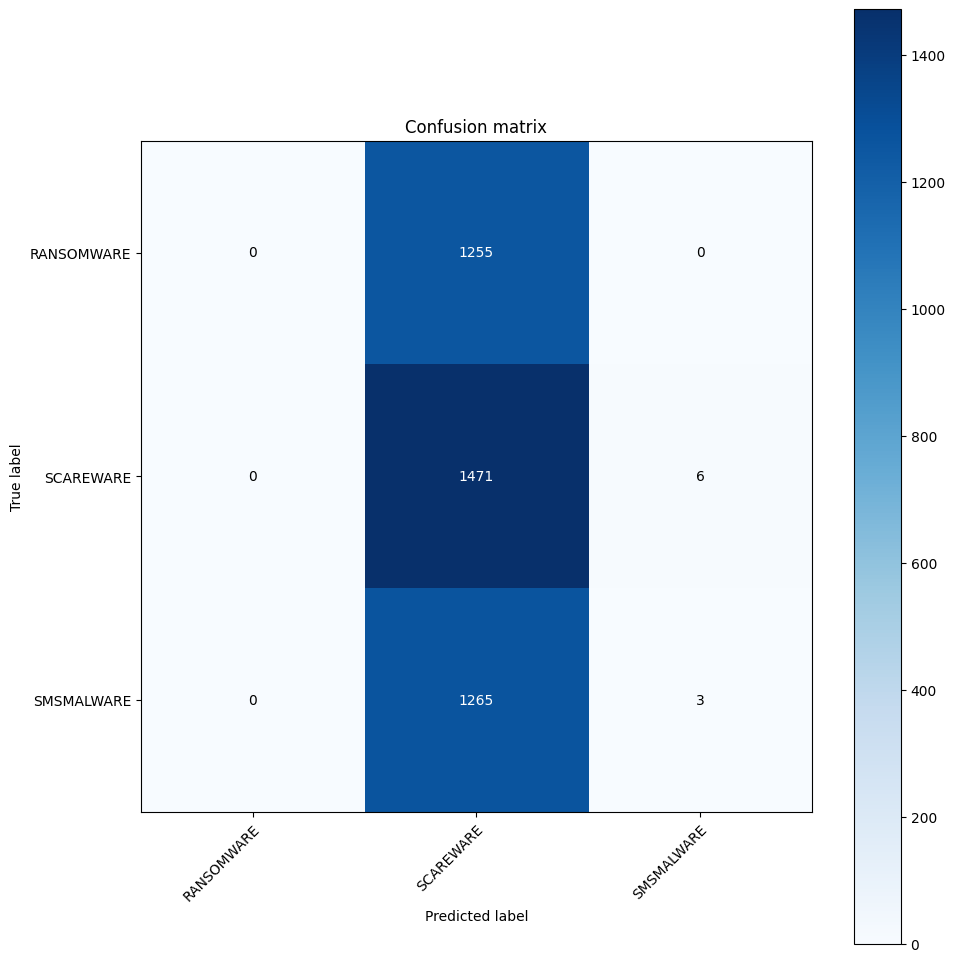

In [9]:
# valuate models

for clf in models:
    # print scores 
    print(f'{clf.__class__.__name__}:')
    valuate(clf, X_test[:4_000], y_test[:4_000])

# Softmax Regression

In [11]:
from sklearn.linear_model import LogisticRegression

logistic_classifier = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

  RANSOMWARE       0.36      0.30      0.33     38204
   SCAREWARE       0.39      0.71      0.50     44750
  SMSMALWARE       0.41      0.05      0.09     36168

    accuracy                           0.38    119122
   macro avg       0.38      0.35      0.31    119122
weighted avg       0.38      0.38      0.32    119122



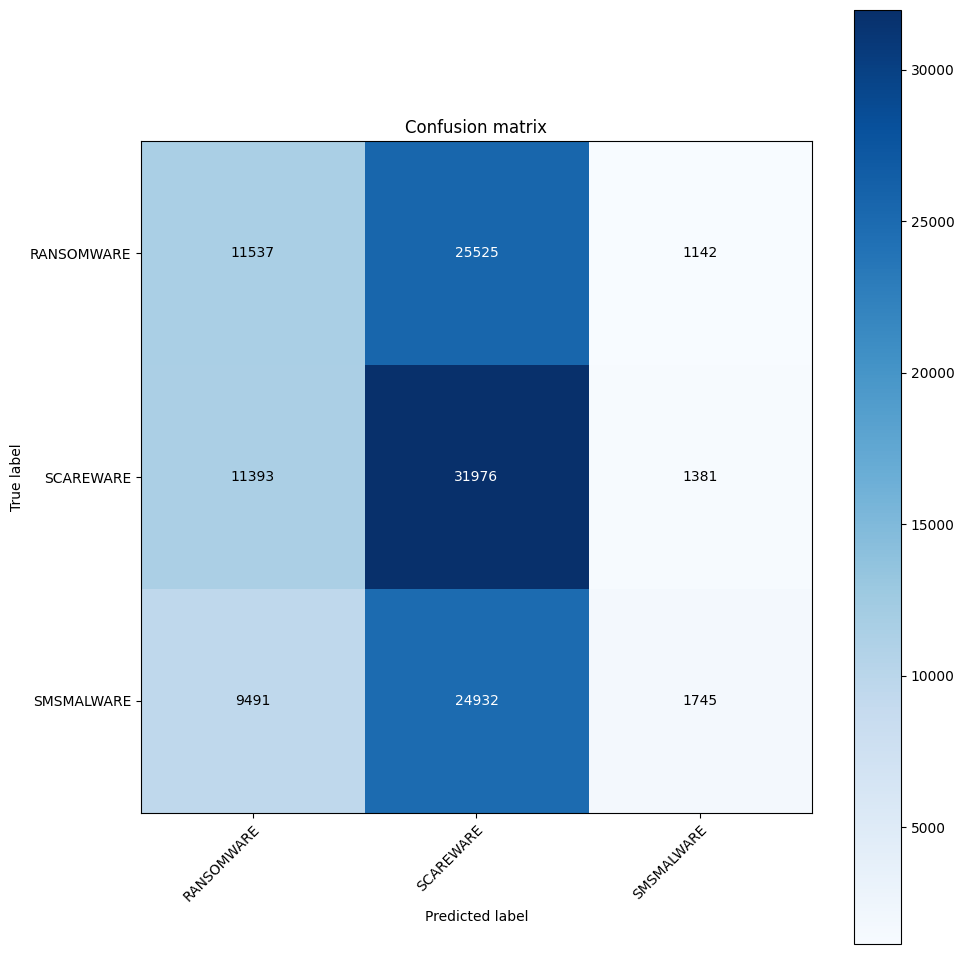

In [12]:
valuate(logistic_classifier, X_test, y_test)

# Gaussian Discriminant Analysis

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_classifier = LinearDiscriminantAnalysis().fit(X_train, y_train)

              precision    recall  f1-score   support

  RANSOMWARE       0.38      0.21      0.27     38204
   SCAREWARE       0.41      0.76      0.53     44750
  SMSMALWARE       0.42      0.17      0.24     36168

    accuracy                           0.40    119122
   macro avg       0.40      0.38      0.35    119122
weighted avg       0.40      0.40      0.36    119122



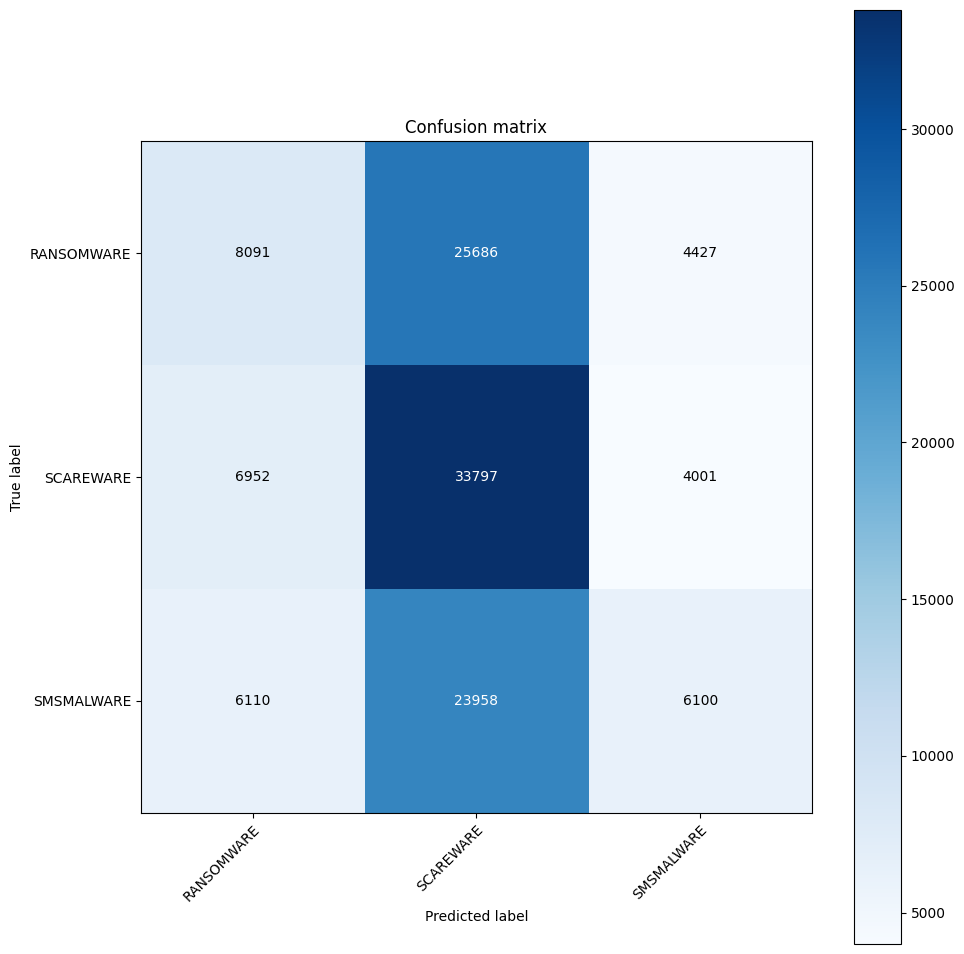

In [14]:
valuate(lda_classifier, X_test, y_test)

# MultiLayer Perceptron

In [46]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=32)
# X_train_reduced = pca.fit_transform(X_train)
# X_test_reduced = pca.transform(X_test)

In [47]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cpu


In [48]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoding(y):
    y = y.values.reshape(-1, 1)
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(y)
    y = ohe.transform(y)
    return y


In [50]:
from torch import nn

class MultiClassNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(83, 8)
        self.act = nn.ReLU()
        self.output = nn.Linear(8, 3)

    def forward(self, x):
        x = self.act(self.hidden(x))
        x = self.output(x)
        return x
    
model = MultiClassNN()


In [51]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(one_hot_encoding(y_train), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(one_hot_encoding(y_test), dtype=torch.float32)


In [52]:
import copy
import tqdm
from torch import optim

# loss metric and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# prepare model and training parameters
n_epochs = 1
batch_size = 5
batches_per_epoch = len(X_train) // batch_size

best_acc = - np.inf   # init to negative infinity
best_weights = None
train_loss_hist = []
train_acc_hist = []
test_loss_hist = []
test_acc_hist = []

# training loop
for epoch in range(n_epochs):
    epoch_loss = []
    epoch_acc = []
    # set model in training mode and run through each batch
    model.train()
    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar:
        bar.set_description(f"Epoch {epoch}")
        for i in bar:
            # take a batch
            start = i * batch_size
            X_batch = X_train_tensor[start:start+batch_size]
            y_batch = y_train_tensor[start:start+batch_size]

            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            
            # backward pass
            optimizer.zero_grad()
            loss.backward()

            # update weights
            optimizer.step()

            # compute and store metrics
            acc = (torch.argmax(y_pred, 1) == torch.argmax(y_batch, 1)).float().mean()
            epoch_loss.append(float(loss))
            epoch_acc.append(float(acc))
            bar.set_postfix(
                loss=float(loss),
                acc=float(acc)
            )

    # set model in evaluation mode and run through the test set
    model.eval()
    y_pred = model(X_test_tensor)
    ce = loss_fn(y_pred, y_test_tensor)
    acc = (torch.argmax(y_pred, 1) == torch.argmax(y_test_tensor, 1)).float().mean()
    ce = float(ce)
    acc = float(acc)
    train_loss_hist.append(np.mean(epoch_loss))
    train_acc_hist.append(np.mean(epoch_acc))
    test_loss_hist.append(ce)
    test_acc_hist.append(acc)
    if acc > best_acc:
        best_acc = acc
        best_weights = copy.deepcopy(model.state_dict())
    print(f"Epoch {epoch} validation: Cross-entropy={ce:.2f}, Accuracy={acc*100:.1f}%")

# Restore best model
model.load_state_dict(best_weights)


Epoch 0: 100%|██████████| 3852/3852 [01:09<00:00, 55.44batch/s, acc=0.2, loss=1.1]     


Epoch 0 validation: Cross-entropy=945.32, Accuracy=34.1%


<All keys matched successfully>

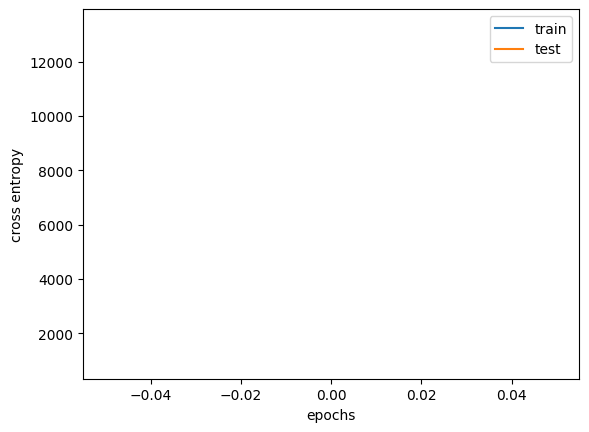

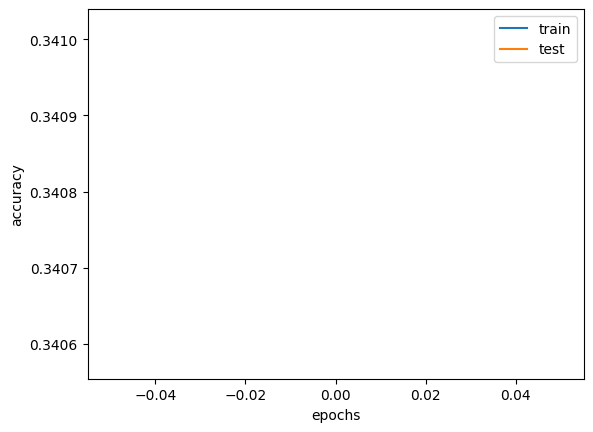

In [53]:

# Plot the loss and accuracy
plt.plot(train_loss_hist, label="train")
plt.plot(test_loss_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("cross entropy")
plt.legend()
plt.show()

plt.plot(train_acc_hist, label="train")
plt.plot(test_acc_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()